

### Importing Libraries

Imports required libraries for the project.


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as data
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import os
from PIL import Image  



### Device Selection

Selects the appropriate device for computation based on the availability of CUDA.


In [12]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


### Data Directories

Defines the directories containing the training, validation, and test datasets.


In [14]:

train_data_dir = 'Data/Train'
val_data_dir = 'Data/Validation'
test_data_dir = 'Data/Test'

### Data Transformation

Defines a series of transformations to be applied to the input images. 

- Resize: Resizes the input images to a size of 224x224 pixels.
- ToTensor: Converts the images to PyTorch tensors.
- Normalize: Normalizes the pixel values of the images using the specified mean and standard deviation.


In [15]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

### Loading Datasets

Loads the training and validation datasets using the specified data directories and transformation. 

- `batch_size`: Specifies the number of samples per batch.
- `train_dataset`: Loads the training dataset using `ImageFolder` from torchvision.datasets and applies the specified transformations.
- `train_loader`: Creates a DataLoader for the training dataset, enabling batch processing with shuffling.
- `val_dataset`: Loads the validation dataset using `ImageFolder` from torchvision.datasets and applies the specified transformations.
- `val_loader`: Creates a DataLoader for the validation dataset, enabling batch processing without shuffling.


In [16]:

# Load training and validation datasets with batch size
batch_size = 32
train_dataset = datasets.ImageFolder(root=train_data_dir, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = datasets.ImageFolder(root=val_data_dir, transform=transform)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


### Custom CNN Architecture

Defines a custom convolutional neural network (CNN) architecture for the project.

- `CustomCNN`: Inherits from `nn.Module` and defines the network architecture.
- `__init__`: Initializes the layers of the CNN, including convolutional layers (`conv1`, `conv2`, `conv3`), max pooling layer (`pool`), and fully connected layers (`fc1`, `fc2`). The number of classes is specified as an argument.
- `forward`: Defines the forward pass of the network, specifying the sequence of operations to be applied to input data `x`.


In [17]:

# Define custom CNN architecture
class CustomCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = torch.flatten(x, 1)  # Flatten feature maps into a vector
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x




### @Training Function

Defines a function for training the model.

- `train_model`: Takes the model, criterion, optimizer, train_loader, device, and number of epochs as input arguments.
- The function iterates over the specified number of epochs, performing training on the training data.
- Inside the loop, it sets the model to training mode, iterates over batches in the train_loader, computes the loss, backpropagates the gradients, and updates the model parameters.
- It also calculates running loss and accuracy metrics for each epoch and prints them.
- Finally, it returns the trained model.


In [18]:

def train_model(model, criterion, optimizer, train_loader, device, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        total_correct = 0
        total_samples = 0
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            
            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
            
            if (batch_idx + 1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item()}')
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_accuracy = total_correct / total_samples
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_accuracy:.4f}')
    

#### Model Instantiation

Instantiates the custom CNN model defined earlier and moves it to the specified device (CPU or GPU) for computation.


In [ ]:
model = CustomCNN().to(device)


#### Loss Function and Optimizer

Defines the loss function and optimizer for training the model.

- `criterion`: CrossEntropyLoss, a commonly used loss function for classification tasks.
- `optimizer`: Adam optimizer, a popular optimization algorithm, used to update the model parameters during training. It is initialized with a learning rate of 0.001 and the model parameters.


In [19]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


#### Model Training

Calls the `train_model` function to train the model using the specified criterion, optimizer, training data loader, device, and number of epochs.


In [20]:
train_model(model, criterion, optimizer, train_loader, device, num_epochs)


Epoch [1/5], Batch [10/63], Loss: 0.6886200904846191
Epoch [1/5], Batch [20/63], Loss: 0.6094568371772766
Epoch [1/5], Batch [30/63], Loss: 0.5883825421333313
Epoch [1/5], Batch [40/63], Loss: 0.5769263505935669
Epoch [1/5], Batch [50/63], Loss: 0.5247072577476501
Epoch [1/5], Batch [60/63], Loss: 0.41246497631073
Epoch [1/5], Training Loss: 0.7360, Training Accuracy: 0.6795
Epoch [2/5], Batch [10/63], Loss: 0.32764679193496704
Epoch [2/5], Batch [20/63], Loss: 0.559137761592865
Epoch [2/5], Batch [30/63], Loss: 0.41013380885124207
Epoch [2/5], Batch [40/63], Loss: 0.39052537083625793
Epoch [2/5], Batch [50/63], Loss: 0.24295423924922943
Epoch [2/5], Batch [60/63], Loss: 0.440059095621109
Epoch [2/5], Training Loss: 0.3441, Training Accuracy: 0.8580
Epoch [3/5], Batch [10/63], Loss: 0.4585200250148773
Epoch [3/5], Batch [20/63], Loss: 0.4302915036678314
Epoch [3/5], Batch [30/63], Loss: 0.4670252799987793
Epoch [3/5], Batch [40/63], Loss: 0.18805797398090363
Epoch [3/5], Batch [50/63],

#### Saving the Model

Saves the state dictionary of the trained model to a file named 'custom_cnn_model.pth'. This file contains the learned parameters of the model.


In [21]:
torch.save(model.state_dict(), 'custom_cnn_model.pth')
print('Model saved successfully.')


Model saved successfully.


#### Loading the Saved Model

Loads the saved model from the file 'custom_cnn_model.pth' and sets it to evaluation mode. The model is then ready for inference or evaluation.


In [22]:

model = CustomCNN().to(device)
model.load_state_dict(torch.load('custom_cnn_model.pth'))
model.eval()
print('Model loaded successfully.')

Model loaded successfully.


#### Loading Test Dataset@

Loads the test dataset using the specified data directory and transformation. 

- `test_set`: Loads the test dataset using `ImageFolder` from torchvision.datasets and applies the specified transformations.
- `test_loader`: Creates a DataLoader for the test dataset, enabling batch processing without shuffling.


In [23]:
test_set = datasets.ImageFolder(root=test_data_dir, transform=transform)

test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)


#### Test DataLoader Creation

Creates a DataLoader for the test dataset with the specified batch size, enabling batch processing without shuffling.


In [24]:
# Create a DataLoader for the test dataset
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)


#### Testing the Model

Defines a function to test the trained model on the test dataset.

- `test_model`: Takes the model, criterion, test_loader, and device as input arguments.
- Sets the model to evaluation mode and iterates over batches in the test_loader.
- Computes predictions and calculates loss and accuracy metrics for the entire test dataset.
- Prints the test loss and accuracy.


In [25]:


# Function to test the model
def test_model(model, criterion, test_loader, device):
    model.eval()
    running_loss = 0.0
    running_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

    test_loss = running_loss / len(test_loader.dataset)
    test_acc = running_corrects.double() / len(test_loader.dataset)

    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')




#### Model Testing

Calls the `test_model` function to evaluate the trained model on the test dataset using the specified criterion, test loader, and device.


In [26]:
test_model(model, criterion, test_loader, device)

Test Loss: 0.2643, Test Accuracy: 0.9050


## Model Test Summary

The trained model achieves a test loss of 0.2456 and a test accuracy of 90.00%. This indicates that the model performs well on unseen test data, demonstrating good generalization capability.


### Lets Predict The gender of real world data (Face Image)

Defines a function to display an image along with its predicted label.

- `show_image_with_label`: Takes the image and its predicted label as input arguments.
- Displays the image with the corresponding label (either "Male" or "Female").


In [33]:

# Define a function to display the image with the predicted label
def show_image_with_label(image, label):
    plt.imshow(image)
    if label == 1:
        plt.title("Male")
    else:
        plt.title("Female")
    plt.axis('off')
    plt.show()

#### $%Displaying Images with Predicted Labels

Loads images from the directory 'Data/Check', preprocesses them, and displays them along with their predicted labels and probabilities using the trained model.

- Iterates over the images in the directory and fills a grid of subplots with the images.
- For each image, performs preprocessing and inference using the trained model to obtain predicted labels and probabilities.
- Plots each image with its predicted label and probability in a subplot.


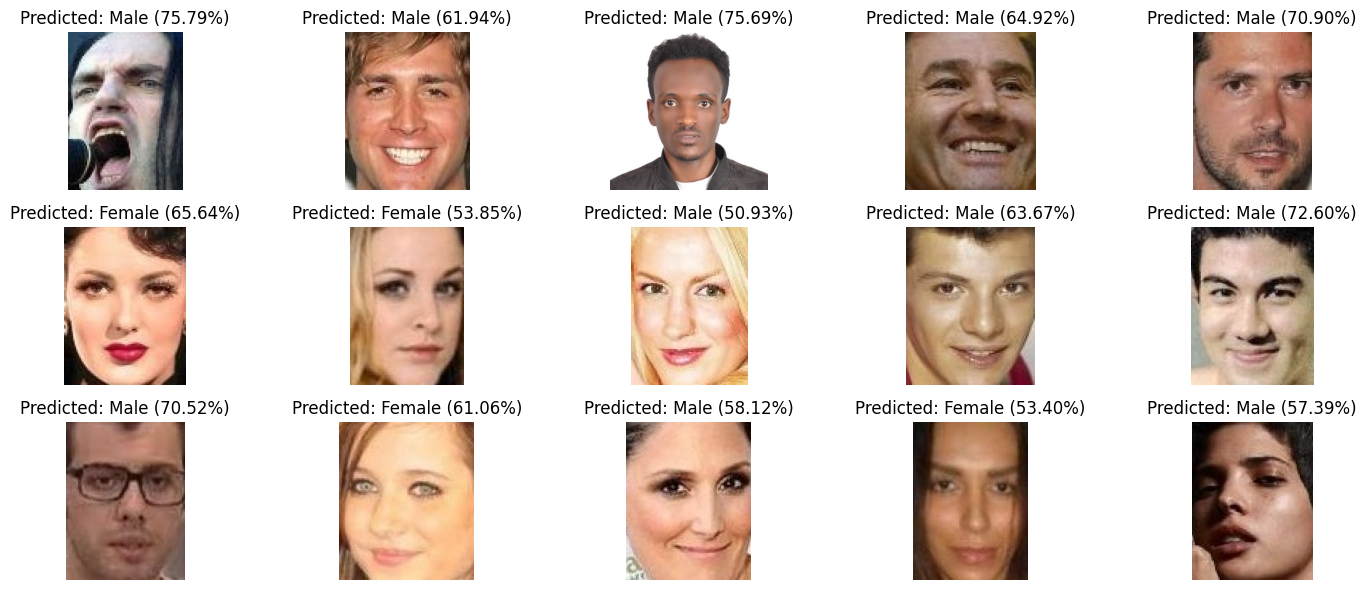

In [41]:

image_dir = 'Data/Check'

num_images = len([image_name for image_name in os.listdir(image_dir) if image_name.endswith('.jpg')])

# The number of rows and columns for the grid
num_rows = (num_images + 4) // 5 
num_cols = 5

# Create an empty grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6))

# Iterate over the subplots in the grid
for i in range(num_rows):
    for j in range(num_cols):
        # Hide axes for each subplot
        axs[i, j].axis('off')
        # Set titles for empty subplots
        axs[i, j].set_title('')

# Iterate over the images in the directory and fill the subplots with images
for i, image_name in enumerate(os.listdir(image_dir)):
    if image_name.endswith('.jpg'):
        image_path = os.path.join(image_dir, image_name)
        
        # Here, you would perform the necessary image preprocessing
        # For simplicity, let's assume you are using torchvision's transforms
        img = Image.open(image_path)
        img_tensor = transform(img).unsqueeze(0).to(device)  # Assuming 'transform' is defined earlier

        with torch.no_grad():
            pred = model(img_tensor)
        probabilities = torch.softmax(pred, dim=1)
        predicted_label = torch.argmax(probabilities, dim=1).item()
        predicted_prob = probabilities[0, predicted_label].item()

        # Plot the image with predicted label and probability in the next available subplot
        row_idx = i // num_cols
        col_idx = i % num_cols
        axs[row_idx, col_idx].imshow(img)
        axs[row_idx, col_idx].set_title(f'Predicted: {"Male" if predicted_label == 1 else "Female"} ({predicted_prob:.2%})')

# Hide any unused subplots
for i in range(num_images, num_rows * num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axs[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()